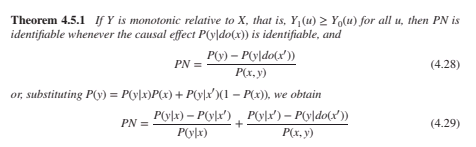

**Exercise (self-study):**
> Justify the substitution $P(y)=P(y|x)P(x) + P(y|x')(1-P(x))$, and use it to prove 4.29 from 4.28.

**Solution:** ...

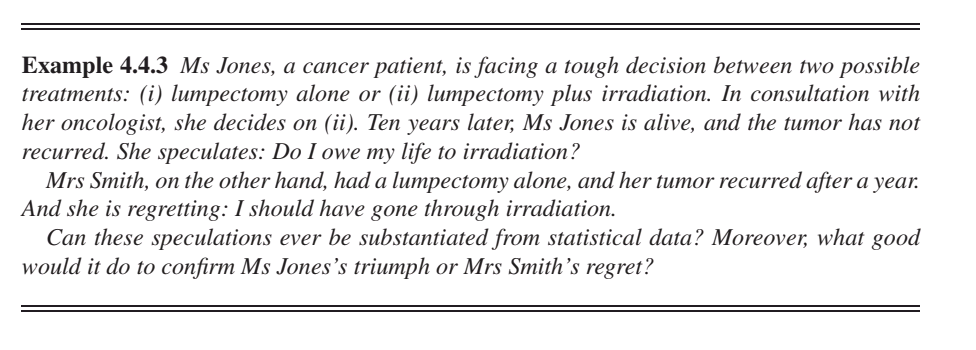
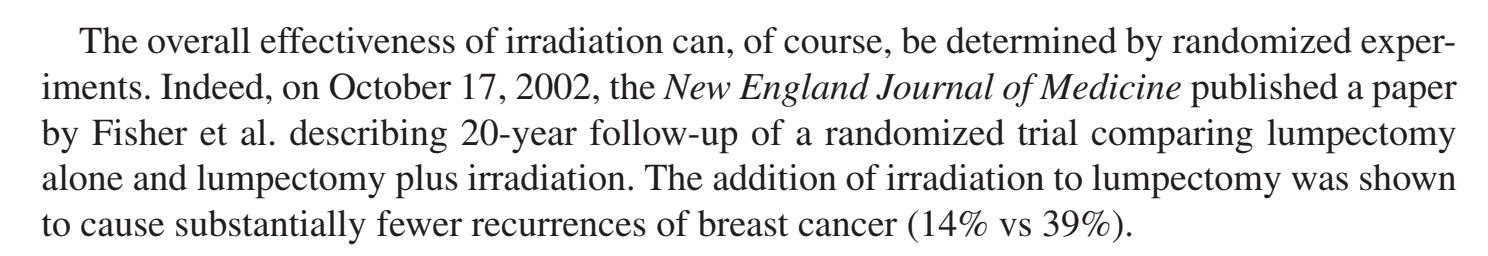
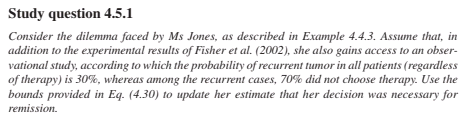
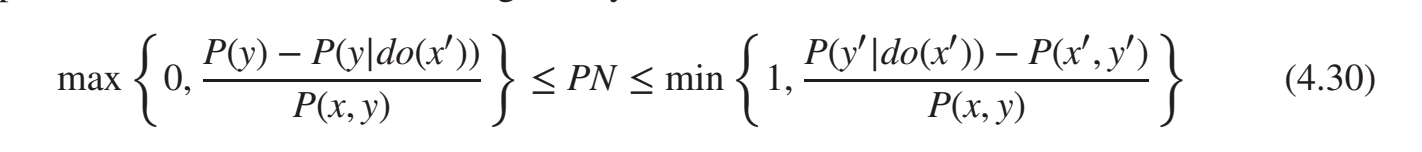

_Question interpretation?_ $Y$ refers to recurrence given lumpectomy. I think we need to assume that "did not choose treatment" refers to "got lumpectomy, but didn't get radiation. $x'$ refers to "did not choose radiation", $x$ refers to "did choose radiation", $y$ refers to "did not recur given lumpectomy", $y'$ refers to "recurred given lumpectomy".

1. How do we obtain $P(y)$? This is $1-P(y')=0.3$.
2. We know that $P(y|do(x))=0.14$, and $P(y|do(x'))=0.39$ (Fisher et al. 2002).
3. By the observational data, we have that $P(x'|y')=P(x',y')/P(y')=0.7$, and that $P(y') = 0.7$. We have $P(x|y')=1-P(x'|y')=0.3=P(x,y')/P(y')$. Therefore:
  * $P(x', y')=0.7 * 0.7 = 0.49$
  * $P(x, y')=0.3 * 0.7 = 0.21$

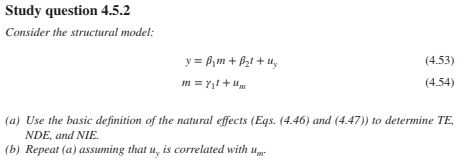

(a) Here $t$ refers to treatment. $Y_{1,M_0}$ the counterfactual world where t=1, but $M$ is given the value it would have if $t=0$.

<!-- So $M_0= (M-\gamma_1 t)$, and $Y_{t=i,M_0}=Y-\gamma_1 \beta_1 i - \beta_2(t_{actual} - i)$ -->

We can compute each of the terms in the NDE:
$$ Y_{1,M_0} = \beta_1 u_m + \beta_2 + u_y$$
$$ Y_{0,M_0} = \beta_1 u_m + u_y$$
Therefore, we have:
$$ NDE = E[Y_{1,M_0} - Y_{0,M_0}] = E[\beta_1 u_m + \beta_2 + u_y - (\beta_1 u_m + u_y)] = E[\beta_2] = \beta_2$$

Similarly, to compute the NIE, we have:
$$ Y_{0, M_1} = \beta_1(\gamma_1 + u_m) + u_y$$
$$ Y_{0, M_0} = \beta_1\gamma_1u_m + u_y$$
Therefore:
$$ NIE=E[Y_{0, M_1} - Y_{0, M_0}] = \beta_1(\gamma_1 + u_m) + u_y - (\beta_1u_m + u_y) = E[\beta_1] = \beta_1\gamma_1$$

$$ TE = NDE + NIE = \beta_2 + \beta_1\gamma_1 $$

(b) It's the same because it's a linear model and all the terms cancel?

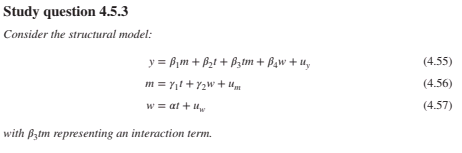
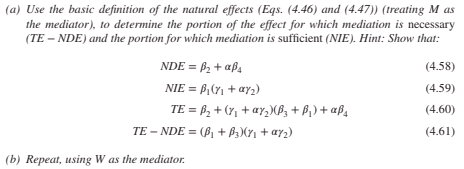

In [30]:
from sympy import symbols, Eq, Symbol
# from sympy.stats import E
import sympy
from IPython.display import display


(y, beta_1, m, beta_2, t, beta_3, beta_4, u_y, gamma_1, gamma_2,
u_m, w, alpha, u_w ) = symbols(
    r"y, \beta_1, m, \beta_2, t, \beta_3, \beta_4, u_y, \gamma_1, \gamma_2,u_m, w, \alpha, u_w")
y_expr = beta_1 * m + beta_2 * t + beta_3 * t * m + beta_4 * w + u_y
m_expr = gamma_1 * t + gamma_2 * w + u_m
w_expr = alpha * t + u_w

Y_1_M0 = sympy.simplify(y_expr.subs({w: w_expr, m: m_expr.subs({w: w_expr}).subs({t: 0})}).subs({t: 1}))

display(Eq(Symbol("Y_{1,M_{0}}"), Y_1_M0))

Y_0_M0 = sympy.simplify(y_expr.subs({w: w_expr, m: m_expr.subs({w: w_expr}).subs({t: 0})}).subs({t: 0}))
display(Eq(Symbol("Y_{0,M_{0}}"), Y_0_M0))
# Assuming u_w and u_m are uncorrelated and mean 0
NDE_M = sympy.simplify((Y_1_M0 - Y_0_M0).subs({u_w: 0, u_m: 0}))
display(Eq(Symbol("NDE_M"), NDE_M))

Y_0_M1 = sympy.simplify(y_expr.subs({w: w_expr, m: m_expr.subs({w: w_expr}).subs({t: 1})}).subs({t: 0}))
Y_0_M0 = sympy.simplify(y_expr.subs({w: w_expr, m: m_expr.subs({w: w_expr}).subs({t: 0})}).subs({t: 0}))
# Assuming u_w and u_m are uncorrelated and mean 0
NIE_M = sympy.simplify((Y_0_M1 - Y_0_M0).subs({u_w: 0, u_m: 0}))
display(Eq(Symbol("NIE_M"), NIE_M))

full_y_expr = y_expr.subs({m: m_expr}).subs({w: w_expr})
TE_M = sympy.simplify(
    full_y_expr.subs({t: 1}) - full_y_expr.subs({t: 0}))
display(Eq(Symbol("TE"), TE_M.subs({u_w: 0, u_m: 0})))
assert sympy.simplify(TE_M.subs({u_w: 0, u_m: 0}) - (beta_1 + beta_3) * (gamma_1 + alpha * gamma_2)) == 0

Eq(Y_{1,M_{0}}, \beta_1*(\gamma_2*u_w + u_m) + \beta_2 + \beta_3*(\gamma_2*u_w + u_m) + \beta_4*(\alpha + u_w) + u_y)

Eq(Y_{0,M_{0}}, \beta_1*(\gamma_2*u_w + u_m) + \beta_4*u_w + u_y)

Eq(NDE_M, \alpha*\beta_4 + \beta_2)

Eq(NIE_M, \beta_1*(\alpha*\gamma_2 + \gamma_1))

Eq(TE, \alpha*\beta_1*\gamma_2 + \alpha*\beta_3*\gamma_2 + \alpha*\beta_4 + \beta_1*\gamma_1 + \beta_2 + \beta_3*\gamma_1)

AssertionError: 

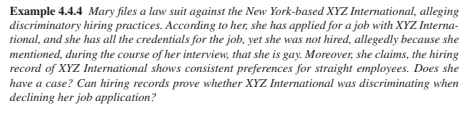

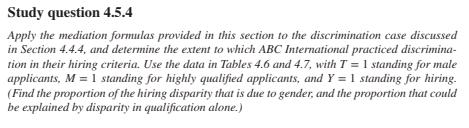

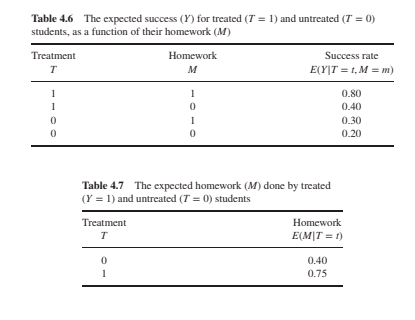

We have the following table:
* $E(hired|male, qualified)=0.80$
* $E(hired|male, unqualified)=0.40$
* $E(hired|female, qualified)=0.30$
* $E(hired|female, unqualified)=0.20$
* $E(qualified|female)=0.40$
* $E(qualified|male)=0.75$

Proportion of the hiring disparity that is due to gender: Natural direct effect, computed in the text as 0.32

Proportion that could be explained by the disparity in qualification alone: Natural indirect effect, computed in the text as 0.035